MNIST fashion using TF2 and keras

In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [0]:
npad=((0,0),(2,2),(2,2))
train_images=np.pad(train_images, npad, mode='constant')
test_images=np.pad(test_images,npad,mode='constant')
print(train_images.shape)
print(train_images.shape)

(60000, 32, 32)
(60000, 32, 32)


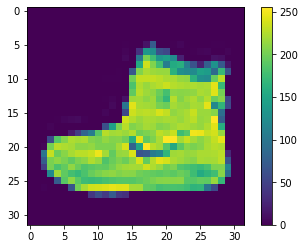

In [0]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

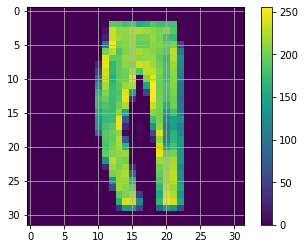

In [0]:
plt.figure()
plt.imshow(test_images[5])
plt.colorbar()
plt.grid(True)
plt.show()

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [0]:
train_images = train_images[..., tf.newaxis]
test_images = test_images[...,tf.newaxis]

In [0]:
model=keras.Sequential()
model.add(keras.layers.Conv2D(filters=6,kernel_size=(5,5),strides=(1,1), activation='relu',input_shape=(32,32,1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(keras.layers.Conv2D(filters=16,kernel_size=(5,5),strides=(1,1), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=120, activation='relu'))
model.add(keras.layers.Dense(units=84, activation='relu'))
model.add(keras.layers.Dense(units=10, activation='softmax'))


In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [0]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 42s 699us/sample - loss: 0.4489 - accuracy: 0.8349
Epoch 2/10
60000/60000 [==============================] - 42s 699us/sample - loss: 0.3424 - accuracy: 0.8749
Epoch 3/10
60000/60000 [==============================] - 42s 703us/sample - loss: 0.3012 - accuracy: 0.8895
Epoch 4/10
60000/60000 [==============================] - 42s 702us/sample - loss: 0.2737 - accuracy: 0.8988
Epoch 5/10
60000/60000 [==============================] - 42s 697us/sample - loss: 0.2534 - accuracy: 0.9062
Epoch 6/10
60000/60000 [==============================] - 42s 694us/sample - loss: 0.2362 - accuracy: 0.9123
Epoch 7/10
60000/60000 [==============================] - 42s 694us/sample - loss: 0.2201 - accuracy: 0.9186
Epoch 8/10
60000/60000 [==============================] - 41s 689us/sample - loss: 0.2087 - accuracy: 0.9208
Epoch 9/10
60000/60000 [==============================] - 42s 692us/sample - loss: 0.1967 - accuracy: 0.9

In [0]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 3s - loss: 0.2922 - accuracy: 0.9015

Test accuracy: 0.9015


In [0]:
predictions = model.predict(test_images)

In [0]:
predictions[5]

array([3.1661056e-11, 1.0000000e+00, 3.8591072e-14, 2.4594056e-11,
       2.0418065e-11, 1.6306433e-17, 1.5936797e-11, 2.0794219e-23,
       5.8939811e-11, 2.8111456e-23], dtype=float32)

In [0]:
np.argmax(predictions[5])

1

In [0]:
test_labels[5]

1

Testing with MNIST


In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


In [0]:
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


In [0]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [0]:
npad=((0,0),(2,2),(2,2))
train_images=np.pad(train_images,npad,mode='constant')
test_images=np.pad(test_images, npad, mode='constant')
print(train_images.shape)
print(test_images.shape)

(60000, 32, 32)
(10000, 32, 32)


<function matplotlib.pyplot.show>

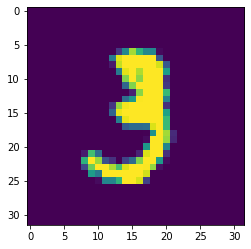

In [0]:
plt.figure()
plt.imshow(train_images[10])
plt.show

<function matplotlib.pyplot.show>

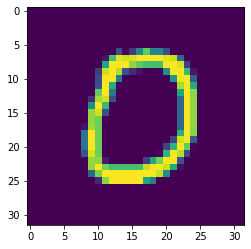

In [0]:
plt.figure()
plt.imshow(test_images[10])
plt.show

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [0]:
train_images = train_images[..., tf.newaxis]
test_images = test_images[...,tf.newaxis]

In [0]:
                
model=keras.Sequential()
model.add(keras.layers.Conv2D(filters=6,kernel_size=(5,5),strides=(1,1), activation='relu',input_shape=(32,32,1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(keras.layers.Conv2D(filters=16,kernel_size=(5,5),strides=(1,1), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=120, activation='relu'))
model.add(keras.layers.Dense(units=84, activation='relu'))
model.add(keras.layers.Dense(units=10, activation='softmax'))

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 41s 691us/sample - loss: 0.1848 - accuracy: 0.9427
Epoch 2/10
60000/60000 [==============================] - 41s 682us/sample - loss: 0.0619 - accuracy: 0.9812
Epoch 3/10
60000/60000 [==============================] - 41s 688us/sample - loss: 0.0428 - accuracy: 0.9865
Epoch 4/10
60000/60000 [==============================] - 41s 690us/sample - loss: 0.0331 - accuracy: 0.9898
Epoch 5/10
60000/60000 [==============================] - 41s 682us/sample - loss: 0.0268 - accuracy: 0.9915
Epoch 6/10
60000/60000 [==============================] - 41s 689us/sample - loss: 0.0232 - accuracy: 0.9925
Epoch 7/10
60000/60000 [==============================] - 41s 681us/sample - loss: 0.0184 - accuracy: 0.9938
Epoch 8/10
60000/60000 [==============================] - 41s 681us/sample - loss: 0.0163 - accuracy: 0.9948
Epoch 9/10
60000/60000 [==============================] - 41s 683us/sample - loss: 0.0162 - accuracy: 0.9

In [0]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 3s - loss: 0.0328 - accuracy: 0.9906

Test accuracy: 0.9906


In [0]:
predictions = model.predict(test_images)

In [0]:
predictions[10]

array([1.0000000e+00, 4.5235281e-16, 1.3145405e-15, 1.3987892e-20,
       1.4615118e-14, 1.1584582e-17, 4.9102055e-16, 2.3678072e-17,
       1.8017399e-15, 1.2661588e-13], dtype=float32)

In [0]:
np.argmax(predictions[10])

0

In [0]:
test_labels[10]

0